# Procedure

[1. Load in manually labeled Dataset](#ref_start_with_dataset)  
[2. Dataframe creation:](#ref_dataset_creation)  
>[2.1. Title (action / object split) (n=151) - df_t_sp](#create_headline_split) 
>[2.2. 4THeadline full (n=165) - df_t](#create_headline_full)  
>[2.3. Manual reasoning paragraph (n=165) - df_p](#2,3)  

[3. LDA](#3)  
>[3.1. Datapreprocessing on Datasets df_t_sp, df_t, df_p (lowercasing, non-apha character removal, SW removal, lemmatization)](#3,1)  
>[3.2. Topic Modelling on each Dataset](#3,2)  
>>[3.2.1. Individual Hyperparameter setting on each through coherence, perplexity](#3,2,1)  
>>[3.2.2. LDA modelling on each dataset](#3,2,2)  
>>[3.2.3 Word clouds](#3,2,3)  

[4. BERTopic](#4)  
>[4.1. No preprocessing on all datasets, except for stopword removal (SAME LIST)](#4,1)  
>[4.2. Modelling with default values](#4,2)  
>[4.3. Clustering](#4,3)  
>[4.4 Word clouds](#4,4)  

 Anchor <a id = "Ref_Start_with_Dataset"></a> 

### Load in manually labeled Dataset

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [337]:
import pandas as pd
#pd.set_option('display.max_colwidth', 200)
df1 = pd.read_csv("C://Users//einos//Documents//Bachelor Arbeit//Wer//Announcement collection - 55 combinations//Analyzing 200 news//WHY//ManualClassificationByPurpose_Working_CSVFILE2.csv", sep = ';')

In [338]:
import spacy
nlp = spacy.load('en_core_web_md')

In [339]:
df1

,URL,date,Title,Company,Layer,Usecase Announcement,ALL PARTNERS,Text_cleaned,Reasoning Structure,Contract number,Reasoning purpose,Purpose 1,R1,Purpose 2,R2,Purpose 3,R3,Combination Comp - usecase
0,https://www.2getthere.eu/news/strategic-cooper...,"2015, 9, 2",Strategic Cooperation Agreement with SLTN exte...,2getthere,L2,Ridepooling,SLTN,"Eugene Tuijnman, CEO of SLTN Inter Access and ...","Eugene Tuijnman, CEO of SLTN Inter Access and ...",2.2. Renewed Alliance,The cooperation concerns the realization of 2g...,Joint D&D,The cooperation concerns the realization of 2g...,NaN,NaN,NaN,NaN,2getthere-Ridepooling
1,https://www.2getthere.eu/news/partnering-with-...,"2015, 7, 28",2getthere partners with Benteler for the engin...,2getthere,L2,Ridepooling,Benteler,"BENTELER Engineering Services, reliable engine...","BENTELER Engineering Services, reliable engine...",2.2. Renewed Alliance,BENTELER Engineering Services will be responsi...,Joint Production,BENTELER Engineering Services will be responsi...,NaN,NaN,NaN,NaN,2getthere-Ridepooling
2,https://www.2getthere.eu/news/singapore-partne...,"2014, 6, 3",SMRT and 2getthere enter into a partnership fo...,2getthere,L2,Ridepooling,SMRT,"At the start of the World Eco City Summit, lea...","At the start of the World Eco City Summit, lea...",2.4. Exclusive Alliance,cooperation agreement for the introduction of ...,Joint Service Agreement,cooperation agreement for the introduction of ...,NaN,NaN,NaN,NaN,2getthere-Ridepooling
3,https://www.2getthere.eu/news/uae-partner-unit...,"2016, 1, 25",UAE partner United Technical Services takes a ...,2getthere,L2,Ridepooling,United Technical Services,Long time partner United Technical Services (U...,Long time partner United Technical Services (U...,3. Strategic Partnership,In anticipation of the growing demand for 2get...,Other,In anticipation of the growing demand for 2get...,NaN,NaN,NaN,NaN,2getthere-Ridepooling
4,https://www.2getthere.eu/news/2getthere-asia-j...,"2016, 4, 20",2getthere Asia Joint Venture established in Si...,2getthere,L2,Ridepooling,SMRT,SMRT Services Pte. Ltd. (SMRT Services) and 2 ...,today announced a Joint Venture (joint venture...,4. Joint Venture,"The new Singapore-based joint venture, called ...",Joint Service Agreement,"The new Singapore-based joint venture, called ...",NaN,NaN,NaN,NaN,2getthere-Ridepooling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,https://www.uberfreight.com/blog/uber-freight-...,"2022, 6, 7",Uber Freight and Waymo Via partner to accelera...,Waymo,L1,Trucking,Uber Freight,Today Uber Freight and Waymo Via announce a lo...,Today Uber Freight and Waymo Via announce a lo...,2.3. Long term Alliance,This partnership brings together the power of ...,Joint Service Agreement,This partnership brings together the power of ...,NaN,NaN,NaN,NaN,Waymo-Trucking
175,https://waabi.ai/waabi-uber-freight/,"2023, 9, 21",Partnering with Uber Freight to build an indus...,Uber Freight,L4,Trucking,Waabi,Today marks a significant milestone for Waabi ...,Today marks a significant milestone for Waabi ...,2.3. Long term Alliance,The agreement pairs Waabi's core technology”th...,Joint Service Agreement,The agreement pairs Waabi's core technology”th...,NaN,NaN,NaN,NaN,Uber Freight-Trucking
176,https://waymo.com/blog/2019/05/partnering-with...,"2019, 5, 7",Partnering with Lyft to serve more riders in M...,Lyft,L4,Ridehailing,Waymo,"Six months ago, we launched Waymo One, our com...","Today, we're pleased to share some details of ...",2.1. Short term Alliance (no exclusivity / pre...,"As a first step, we'll deploy 10 Waymo vehicle...",Supply Partnership (extended),"As a first step, we'll deploy 10 Waymo vehicle...",NaN,NaN,NaN,NaN,Lyft-Ridehailing
177,https://waymo.com/blog/2019/06/partnering-with...,"2019, 6, 19","Partnering with The Alliance in France, Japan,...",Waymo,L1,Last-Mile,"Alliance Ventures (Renault, Nissan, Mitsubishi)",Today we're announcing that Waymo has entered ...,Today we're announcing th

Anchor <a id = "ref_dataset_creation"></a> 


### Dataframe creation

In [340]:
df = df1.copy(deep= True)

In [341]:
keep_columns = ['URL', 'date','Company','Title', 'Usecase Announcement', 'Text_cleaned', 'R1', 'Purpose 1', 'Contract number']
df = df[keep_columns]

In [342]:
df.head(2)

,URL,date,Company,Title,Usecase Announcement,Text_cleaned,R1,Purpose 1,Contract number
0,https://www.2getthere.eu/news/strategic-cooper...,"2015, 9, 2",2getthere,Strategic Cooperation Agreement with SLTN exte...,Ridepooling,"Eugene Tuijnman, CEO of SLTN Inter Access and ...",The cooperation concerns the realization of 2g...,Joint D&D,2.2. Renewed Alliance
1,https://www.2getthere.eu/news/partnering-with-...,"2015, 7, 28",2getthere,2getthere partners with Benteler for the engin...,Ridepooling,"BENTELER Engineering Services, reliable engine...",BENTELER Engineering Services will be responsi...,Joint Production,2.2. Renewed Alliance


Anchor <a id = "3"></a>  


# 3. Topic Modelling

Anchor <a id = "3,1"></a> 


## 3.1. Datapreprocessing on all Datasets (lowercasing, non-apha character removal, SW removal, lemmatization)

#### Replace all partnership words with a unified 

In [343]:
import re
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

partnership_words = ['partnership agreement', 'cooperation agreement','partner', 'partnership', 'partnerships', 'partnering', 'partnered',  'alliance','collaboration',  'collaborating', 'collaborate', 'collaborated', 'cooperation', 'cooperate', 'team with', 'teaming with',
                         'teamed with', 'team up', 'teaming up', 'link up', 'license', 'licensed', 'licensing','work together', 'worked together', 'working together', 'work with', 'worked with', 'working with','join forces', 'joined forces', 
                         'announced','announce','world','collaborate', 'agreement']

def replace_partnership_words(text):
    # Compile a regular expression pattern from the partnership_words list
    pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, partnership_words)) + r')\b', re.IGNORECASE)

    
    #Replace the matched words with '{partnership_word}'
    replaced_text = re.sub(pattern, '{ps_word}', text)

    # Replace consecutive occurrences of '{partnership_word}' with a single occurrence
    replaced_text = re.sub(r'(\{ps_word\}\s*){2,}', '{ps_word} ', replaced_text)
    replaced_text = re.sub(r'[@$€-]', '', text)


    # Remove tokens of character length three
    replaced_text = ' '.join(word for word in replaced_text.split() if len(word) >= 3)

    # Delete all special characters except for '_'

    return replaced_text

# Example usage:
# df['Title_uni'] = df['Title'].apply(replace_partnership_words)
#df['Text_uni'] = df['Text_cleaned'].apply(replace_partnership_words)
#df['single_reason_uni'] = df['R1'].apply(replace_partnership_words)
df['Titles'] = df['Title'].apply(replace_partnership_words)


In [344]:
#delete partnership words
import re
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

partnership_words = ['partnership agreement', 'cooperation agreement','partner', 'partnership', 'partnering', 'partnered',  'alliance','collaboration',  'collaborating', 'collaborate', 'collaborated', 'cooperation', 'cooperate', 'team with', 'teaming with',
                         'teamed with', 'team up', 'teaming up', 'link up', 'license', 'licensed', 'licensing','work together', 'worked together', 'working together', 'work with', 'worked with', 'working with','join forces', 'joined forces', 
                         'collaborate', 'agreement', 'strategic']

def replace_partnership_words(text):
    # Compile a regular expression pattern from the partnership_words list
    pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, partnership_words)) + r')\b', re.IGNORECASE)

    # Replace all matches from partnership_words list with an empty string
    replaced_text = re.sub(pattern, '', text)
    replaced_text = re.sub(r'[@;$€\-_”.]', '', text)  # Escape the hyphen to treat it as a literal character

    # Remove tokens of character length three or less
    replaced_text = ' '.join(word for word in replaced_text.split() if len(word) > 3)


    # Remove consecutive occurrences of spaces
    replaced_text = re.sub(r'\s+', ' ', replaced_text)

    # Remove leading and trailing spaces
    replaced_text = replaced_text.strip()

    return replaced_text

# Example usage:
# df['Title_uni'] = df['Title'].apply(replace_partnership_words)
#df['Text_uni'] = df['Text_cleaned'].apply(replace_partnership_words)
#df['single_reason_uni'] = df['R1'].apply(replace_partnership_words)
df['Titles_uni'] = df['Titles'].apply(replace_partnership_words)

#### Try using porter stemmer

In [345]:
other = ['driving', 'strategic', 'company', 'new','technology', 'based','said', 'paul', 'ceo','NYSE','closely','concrete', 'example', 'jointly','in addition,', 'additionally', 'addition', 'sometimes', 'yet',
         'although', 'however', 'still', 'word', 'large', 'big', 'industry', 'leading', 'leader','common', 'first','last', 'end','start','long','term',
         'corp.', 'inc','ltd.','corp', 'inc.','ltd' "year","today", "uber", "major", "work", "together","joint","company", "decide", "mobility", "solution", "vehicle", 
         "self", "self-driving","selfdriv", "customer", "leader", "market", "company", "av", "EV", "electric", "car", 'announced','announce', 'selfdriv'] 

comps = ["'h-e-b'", '10 roads express', '2getthere', 'aaa northern california, nevada, & utah', 'ad council', 'adastec', 'alliance ventures (renault, nissan, mitsubishi)', 'anheuser-busch inbev', 'applied intuition', 'aramex', 'asda', 'aurora', 
         'avis', 'beep', 'berliner verkehrsbetriebe', 'BVG', 'beti', 'beyond meat', 'bolt', 'bosch', 'boston university', 'benteler','bridgestone', 'coca cola','cocacola', 'coca-cola europacific partners', 'cartken', 'continental', 'contra costa transportation authority',
         'covenant', 'chargepoint', 'chargepo', 'cristal', 'cruise', 'cummins', 'daimler truck', 'db regio', 'delphi', 'derq', 'deutsche bahn', 'dhl', 'e charger systems', 'e.go', 'ego' 'easymile', 'ecarx', 'einride', 'electrolux', 'ericsson', 'eversum', 'ez10','farmstead', 'fca', 
         'fiat chrysler automobiles', 'gatik', 'ge appliances', 'geely', 'general motors', 'gm', 'gtmc','global finance group', 'goggo network', 'goodyear', 'greenpower', 'grubhub', 'guident', 'h-e-b', 'hegelmann group', 
         'hirschbach', 'hochbahn', 'horizon robotics', 'intel', 'ioki', 'ion', 'isuzu commercial truck of america', 'iveco', 'jacksonville transportation authority (jta)','jta', 'kalray', 'kineo', 'kiwibot', 'kodiak', 'kroger', 
         'lavta', 'liberty mutual insurance', 'lidl', 'liftango', 'lightning emotors', 'loadsmith', 'lohr', 'luminar', 'lyft', 'maas alliance', 'man truck & bus', 'may mobility', 'michelin', 'microsoft', 'minga',
         'minnesota department of transportation', 'mission secure', 'mit center for transportation & logistics', 'mitsubishi', 'mobileye', 'moia', 'moovit', 'mothers-against-drunk-driving', 'motional', 'navistar', 
         'navtech radar', 'navya', 'nevs', 'nickelytics', 'nio', 'north carolina department of transportation', 'nuro', 'oatly', 'ocado group', 'onsemi', 'oxa', 'oxa', 'oxbotica', 'partners for automated vehicle education (pave)', 
         'partnership for transportation innovation & opportunity', 'polestar', 'perrone', 'perrone robotics', 'phoenix motorcars', 'piestro', 'pitney bowes', 'pizza hut', 'ponyai','pony.ai','ponytron','plus.ai', 'plusai', 'plus','polarrenen',
         'polarba','polarbaersgruppen','polarba', 'pony.ai', 'porsche', 'rampini', 'replate', 'ryder', 'sae international', 'sany', 'serve robotics', 'shanghai jiading industrial zone', 'sinotrans', 'skf', 'sltn', 'smrt', 'sodexo','sono motors', 'spare', 
         'stantec', 'starship technologies', 'sustainability partners', 'svenska retursystem', 'swiss re', 'telia', 'torc', 'toyota', 'transdev', 'transport for nsw (tfnsw)', 'transurban group', 'traton', 'tropos technologies', 'trustinsoft', 'tusimple', 
         'u.s. xpress', 'uae ministry of energy and infrastructure', 'uber', 'uber eats', 'uber freight', 'udelv', 'united technical services', 'university of california (san diego)', 'uva', 'uva foundation', 'valeo', 'valley metro', 
         'verily', 'via', 'vicinity motor corp.', 'volkswagen nutzfahrzeuge', 'volvo autonomous solutions', 'volvo cars', 'waabi', 'walmart', 'waymo', 'waymo via', 'wayve', 'werner', 'western reserve transit authority', 'willer express', 
         'wistron neweb corp', 'zeekr', 'zf group']

partnership_words = ['partnership agreement', 'cooperation agreement','partner', 'partnership', 'partnering', 'partnered',  'alliance','collaboration',  'collaborating', 'collaborate', 'collaborated', 'cooperation', 'cooperate', 'team with', 'teaming with',
                         'teamed with', 'team up', 'teaming up', 'link up', 'license', 'licensed', 'licensing','work together', 'worked together', 'working together', 'work with', 'worked with', 'working with','join forces', 'joined forces', 
                         'announced','announce','world','collaborate', 'agreement']

In [346]:
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
porter_stemmer = PorterStemmer()

customized_stopwords_title = [*comps, *other,*partnership_words]

customized_stopwords_title = [k.lower() for word in customized_stopwords_title for k in word.split()]

stopwords = set(nlp.Defaults.stop_words)
stopwords.update(customized_stopwords_title)

stopwords = stopwords


 
pattern_replace_in_text = {
    #r'l(\W*)(\d+)(\W+)?': r'level \2\3',
   # r'level (\d+)(\W+)?': r' level \1\2',
    r'l(\d+)(\W+)(\W+)?': r'level \1\3 ',
    r'L(\d+)(\-)(\W+)?': r'level \1\3 '
}


def replace_patterns(text, patterns):
    for pattern, replacement in patterns.items():
        text = re.sub(pattern, replacement, text)
    return text                        


def stem_using_NLTK(found_reasoning):
    doc = nlp(found_reasoning)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(token.text).lower() for token in doc if 
                               token.text.lower() not in stopwords and 
                               token.text.lower() not in ['strategics', 'partnerships', 'collabor',' ', '  ', '   ','\n', '\n\n', "\n", 'www', '@'] and 
                               not pd.isna(token.text) and 
                               not token.is_punct and 
                               not token.like_num and 
                               not any(ent.text == 'PERSON' or ent.text == 'GPE' for ent in doc.ents)])

    lemmtized_output = replace_patterns(lemmatized_output, pattern_replace_in_text)
    words = word_tokenize(lemmtized_output)
    stemmed_output = ' '.join([porter_stemmer.stem(word) for word in words])

    return stemmed_output


#df['title_stemmed_uni'] = df['Title_uni'].apply(stem_using_NLTK)
#df['paragraph_stemmed_uni'] = df['single_reason_uni'].apply(stem_using_NLTK)
#df['Text_stemmed_uni'] = df['Text_uni'].apply(stem_using_NLTK)
df['Title_stemmed_uni'] = df['Titles_uni'].apply(stem_using_NLTK)

Text(0.5, 1.0, 'Token count preprocessed Titles')

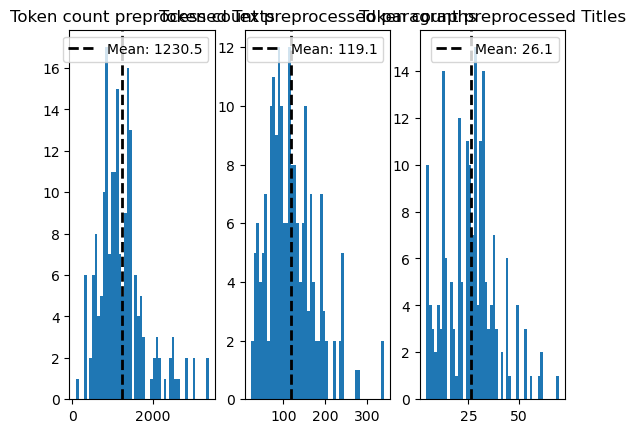

In [347]:
import numpy as np
import matplotlib.pyplot as plt

dict_length_text = {}
dict_explanation_length = {}
dict_length_title = {}

for index, row in df_t_stemmed.iterrows():
    dict_length_text[index] = len([word.split() for word in row['Text_stemmed_uni']])
    
for index, row in df_p_stemmed.iterrows():
    dict_explanation_length[index] = len([word.split() for word in row['paragraph_stemmed_uni']])

for index, row in df_ti_stemmed.iterrows():
    dict_length_title[index] = len([word.split() for word in row['Title_stemmed_uni']])

    
N_points = len(dict_length_title)
n_bins = 50

dist1 = dict_length_text.values()
dist2 = dict_explanation_length.values()
dist3 = dict_length_title.values()


mean_dist1 = np.mean(list(dist1))
mean_dist2 = np.mean(list(dist2))
mean_dist3 = np.mean(list(dist3))




fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=False)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)
axs[2].hist(dist3, bins=n_bins)

axs[0].axvline(x=mean_dist1, color='black', linestyle='--', linewidth=2, label=f'Mean: {mean_dist1:.1f}')
axs[1].axvline(x=mean_dist2, color='black', linestyle='--', linewidth=2, label=f'Mean: {mean_dist2:.1f}')
axs[2].axvline(x=mean_dist3, color='black', linestyle='--', linewidth=2, label=f'Mean: {mean_dist3:.1f}')


axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_title('Token count preprocessed Texts')
axs[1].set_title('Token count preprocessed paragraphs')
axs[2].set_title('Token count preprocessed Titles')

## 3.2. Topic Modelling on each Dataset

Anchor <a id = "3,2,1"></a>  

## Step 2 - Create LDA model

FIND OPTIMAL PERPLEXITY AND COHERENCE PER DATAFRAME

#### LDA for ps_word

In [348]:
from gensim.corpora import Dictionary

### df_t

#contains all preprocessed titles as list of tokens
documents_df_t = [word.split() for word in df_t_stemmed['Text_stemmed_uni']]

# creates a dictionary of all tokens appearing in the corpus of preprocessed titles and their dictionary id
gensim_dict_df_t = Dictionary(documents_df_t)

#assigns the counted BOW representation of all preprocessed titles to variable corpus_action_df_t. In the list, each unique token is represented as (id of token, frequency of tokens)
corpus_df_t = [gensim_dict_df_t.doc2bow(doc) for doc in documents_df_t]

### df_p

#Creates same variables for the df_p dataset accordingly
documents_df_p = [word.split() for word in df_p_stemmed['paragraph_stemmed_uni']]
gensim_dict_df_p = Dictionary(documents_df_p)
corpus_df_p = [gensim_dict_df_p.doc2bow(doc) for doc in documents_df_p]

documents_df_ti = [word.split() for word in df_ti_stemmed['Title_stemmed_uni']]
gensim_dict_df_ti = Dictionary(documents_df_ti)
corpus_df_ti = [gensim_dict_df_ti.doc2bow(doc) for doc in documents_df_ti]

### Draw perplexity, coherence curves

##### Statistics title, paragraph, non stemmed

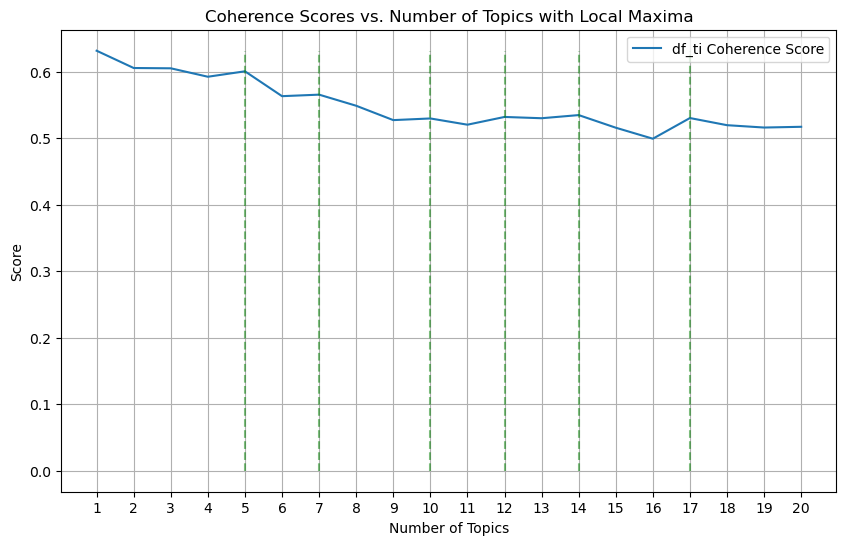

In [349]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from gensim.models import CoherenceModel

# Lists to store coherence and perplexity scores for each LDA model
coherence_scores = {'df_ti': []}

# Range of topics
num_topics_range = range(1, 21)

# Iterate over each LDA model
for lda_model, corpus, dictionary, model_name, text in zip(
    [lda_model_df_ti],
    [corpus_df_ti],
    [gensim_dict_df_ti],
    coherence_scores.keys(),
    [documents_df_ti]):
    
    for num_topics in num_topics_range:
        # Create the LDA model
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,                  # Document corpus (lemmatized, tokenized)
            num_topics=num_topics,          # Number of requested latent topics
            id2word=dictionary,             # Dictionary of (token_id, word) pairs
            passes=10,                      # Number of passes through the corpus during training
            alpha='auto',                   # A-priori belief on document-topic distribution
            chunksize=100,                  # Number of documents to be used in each training chunk
            update_every=1,                 # Number of documents to be iterated through for each update
            random_state=100,               # Random seed
            per_word_topics=True            # Extract the most likely topics given a word
        )

        # Calculate coherence score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_scores[model_name].append(coherence_lda)

# Plotting
plt.figure(figsize=(10, 6))

for model_name in coherence_scores.keys():
    plt.plot(num_topics_range, coherence_scores[model_name], label=f'{model_name} Coherence Score')

# Find local maxima
for model_name, coherence_vals in coherence_scores.items():
    peaks, _ = find_peaks(coherence_vals)
    plt.vlines(x=[num_topics_range[p] for p in peaks], ymin=0, ymax=max(coherence_vals), color='g', linestyle='--', alpha=0.5)

plt.title('Coherence Scores vs. Number of Topics with Local Maxima')
plt.xlabel('Number of Topics')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(num_topics_range)
plt.show()


In [350]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# Lists to store coherence and perplexity scores for each LDA model
perplexity_scores = {'df_ti': []}

# Range of topics
num_topics_range = range(1, 21)

# Iterate over each LDA model
for lda_model, corpus, dictionary, model_name, text in zip(
    [lda_model_df_ti],
    [corpus_df_ti],
    [gensim_dict_df_ti],
    coherence_scores.keys(),
    [documents_df_ti]):
    
    for num_topics in num_topics_range:
        # Create the LDA model
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,                  # Document corpus (lemmatized, tokenized)
            num_topics=num_topics,          # Number of requested latent topics
            id2word=dictionary,             # Dictionary of (token_id, word) pairs
            passes=10,                      # Number of passes through the corpus during training
            alpha='auto',                   # A-priori belief on document-topic distribution
            chunksize=100,                  # Number of documents to be used in each training chunk
            update_every=1,                 # Number of documents to be iterated through for each update
            random_state=100,               # Random seed
            per_word_topics=True            # Extract the most likely topics given a word
        )

      
        # Calculate perplexity score
        perplexity_lda = lda_model.log_perplexity(corpus)
        perplexity_scores[model_name].append(perplexity_lda)

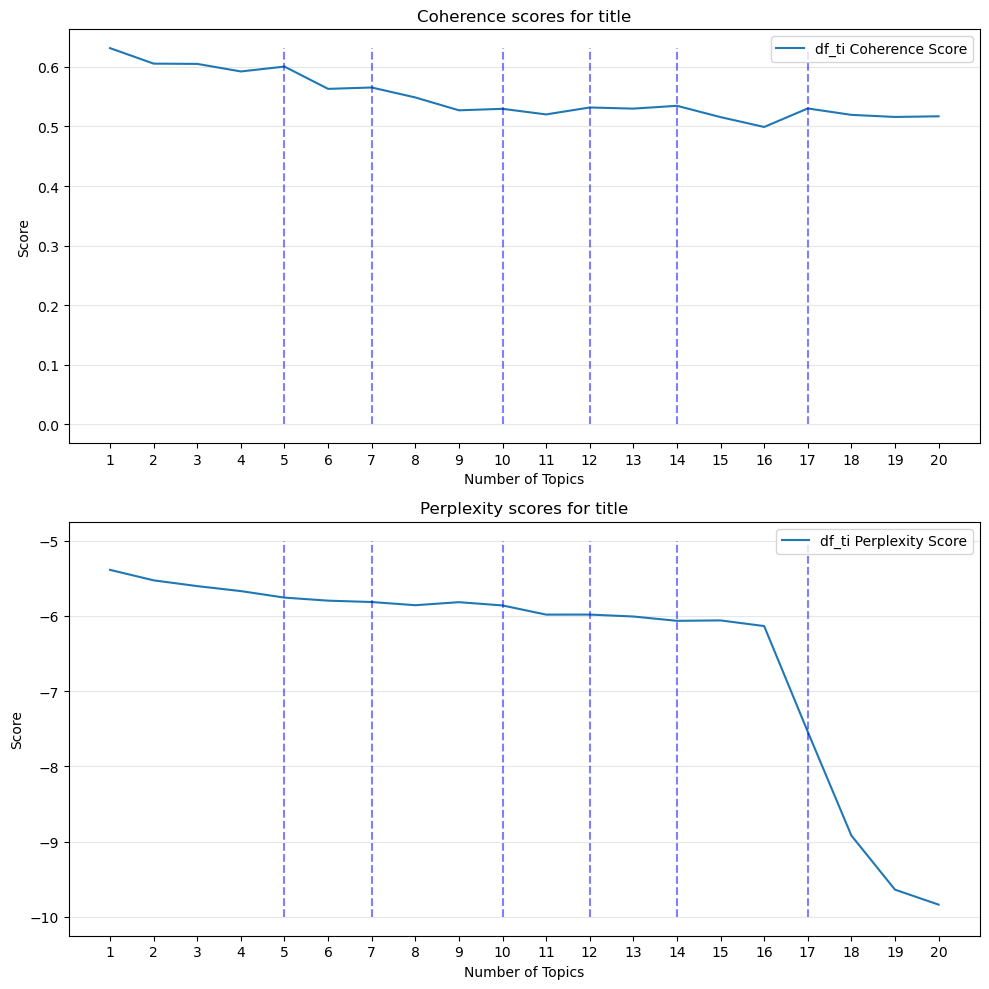

In [351]:
# Plotting
fig, axs = plt.subplots(2, figsize=(10, 10))

# Find local maxima for coherence scores of df_t
peaks_df_ti, _ = find_peaks(coherence_scores['df_ti'])
axs[0].plot(num_topics_range, coherence_scores['df_ti'], label='df_ti Coherence Score')
axs[0].vlines(x=[num_topics_range[p] for p in peaks_df_ti], ymin=0, ymax=max(coherence_scores['df_ti']), color='blue', linestyle='--', alpha=0.5)

# Remove the legend entry for df_p Coherence Score
axs[0].legend(['df_ti Coherence Score'])

#Find local maxima for coherence scores of df_p
#peaks_df_p, _ = find_peaks(coherence_scores['df_p'])
#axs[0].plot(num_topics_range, coherence_scores['df_p'], label='df_p Coherence Score')
#axs[0].vlines(x=[num_topics_range[p] for p in peaks_df_p], ymin=0, ymax=max(coherence_scores['df_p']), color='orange', linestyle='--', alpha=0.5)

# Plot perplexity scores
#for model_name in perplexity_scores.keys():
#    axs[1].plot(num_topics_range, perplexity_scores[model_name], label=f'{model_name} Perplexity Score')

    #leave out df_p
axs[1].plot(num_topics_range, perplexity_scores[model_name], label=f'{model_name} Perplexity Score')

# Plot vertical lines for coherence maxima on perplexity graph
axs[1].vlines(x=[num_topics_range[p] for p in peaks_df_ti], ymin=-10, ymax=-5, color='blue', linestyle='--', alpha=0.5)
# axs[1].vlines(x=[num_topics_range[p] for p in peaks_df_p], ymin=-10, ymax=-5, color='orange', linestyle='--', alpha=0.5)

axs[0].set_title('Coherence scores for title')
axs[0].set_xlabel('Number of Topics')
axs[0].set_ylabel('Score')
axs[0].grid(True, alpha=0.3, axis='y')
axs[0].set_xticks(num_topics_range)

axs[1].set_title('Perplexity scores for title')
axs[1].set_xlabel('Number of Topics')
axs[1].set_ylabel('Score')
axs[1].legend()
axs[1].grid(True, alpha=0.3, axis='y')
axs[1].set_xticks(num_topics_range)

# SAVE PLOT AS IMAGE
plt.tight_layout()
plt.savefig('LDA - Coherence & Perplexity for df_t and df_p ')
plt.show()


In [352]:
# df_t values at peaks
for local_maximum in peaks_df_ti:
    print(local_maximum+1, ' : ',round(coherence_scores['df_ti'][local_maximum],3), '  ', local_maximum, ' : ', round(perplexity_scores['df_ti'][local_maximum],2))

5  :  0.6    4  :  -5.76
7  :  0.565    6  :  -5.82
10  :  0.53    9  :  -5.86
12  :  0.532    11  :  -5.98
14  :  0.535    13  :  -6.07
17  :  0.53    16  :  -7.54


In [353]:
import pandas as pd

# Create a dictionary to store the data
data = {
    'local_maximum': [],
    'coherence': [],
    'perplexity': []
}

# Populate the dictionary
for index, local_maximum in enumerate(num_topics_range):
    coherence = coherence_scores['df_ti'][index]
    perplexity = perplexity_scores['df_ti'][index]
    data['local_maximum'].append(local_maximum)
    data['coherence'].append(coherence)
    data['perplexity'].append(perplexity)

# Convert the dictionary to a DataFrame
df_values = pd.DataFrame(data)

# Display the DataFrame
print(df_values)

    local_maximum  coherence  perplexity
0               1   0.631448   -5.388396
1               2   0.605459   -5.527588
2               3   0.605012   -5.604331
3               4   0.592332   -5.670387
4               5   0.600495   -5.756978
5               6   0.563120   -5.797399
6               7   0.565410   -5.815713
7               8   0.548704   -5.857993
8               9   0.527123   -5.817714
9              10   0.529611   -5.861088
10             11   0.520233   -5.982832
11             12   0.531874   -5.982548
12             13   0.529953   -6.008073
13             14   0.534677   -6.065513
14             15   0.515704   -6.060021
15             16   0.499157   -6.135150
16             17   0.530234   -7.539317
17             18   0.519498   -8.918325
18             19   0.515963   -9.637724
19             20   0.517082   -9.836712


##### Statistics of FULL TEXT and paragraphs

In [354]:
# df_t values at peaks
size_candidates = []
topic_ids = []

# Iterate over the indices of the local maxima
for peak_index in peaks_df_ti:
    # Get the topic ID from num_topics_range using the index of the peak
    topic_id = num_topics_range[peak_index]
    # Append the topic ID to the list
    topic_ids.append(topic_id)

# Print the topic IDs corresponding to the local maxima
print("Topic IDs at local maxima:", topic_ids)


Topic IDs at local maxima: [5, 7, 10, 12, 14, 17]


##### Visualizing LDA model with LDAvis

In [330]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


##### df_t 

###### t = 5

In [355]:
import gensim
from gensim.models import CoherenceModel# spaCy for preprocessing

lda_model_df_ti_t5 = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_ti,    # Document corpus (lemmatized, tokenized)
    num_topics=5,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_ti,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most
    
)

import pickle

import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_df_ti_t5, 
                              corpus=corpus_df_ti, 
                              dictionary=gensim_dict_df_ti)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [ ]:
vis_data = pyLDAvis.gensim.prepare(lda_model_df_t_t4, corpus_df_t, gensim_dict_df_t)
pyLDAvis.save_html(vis_data, 'output_filename.html')

In [392]:
lda_model_df_ti_t7 = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_ti,    # Document corpus (lemmatized, tokenized)
    num_topics=7,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_ti,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

import pickle

import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_df_ti_t7, 
                              corpus=corpus_df_ti, 
                              dictionary=gensim_dict_df_ti)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [395]:
lda_model_df_ti_t10 = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_ti,    # Document corpus (lemmatized, tokenized)
    num_topics=10,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_ti,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

import pickle

import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_df_ti_t10, 
                              corpus=corpus_df_ti, 
                              dictionary=gensim_dict_df_ti)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [396]:
lda_model_df_ti_t12 = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_ti,    # Document corpus (lemmatized, tokenized)
    num_topics=12,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_ti,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

import pickle

import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_df_ti_t12, 
                              corpus=corpus_df_ti, 
                              dictionary=gensim_dict_df_ti)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [397]:
lda_model_df_ti_t14 = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_ti,    # Document corpus (lemmatized, tokenized)
    num_topics=14,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_ti,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

import pickle

import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_df_ti_t14, 
                              corpus=corpus_df_ti, 
                              dictionary=gensim_dict_df_ti)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [398]:
lda_model_df_ti_t17 = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_ti,    # Document corpus (lemmatized, tokenized)
    num_topics=17,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_ti,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

import pickle

import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_df_ti_t17, 
                              corpus=corpus_df_ti, 
                              dictionary=gensim_dict_df_ti)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [81]:
lda_model_df_ti_t18 = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_ti,    # Document corpus (lemmatized, tokenized)
    num_topics=18,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_ti,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

import pickle

import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_df_ti_t18, 
                              corpus=corpus_df_ti, 
                              dictionary=gensim_dict_df_ti)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [63]:
lda_model_df_t_t19 = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_t,    # Document corpus (lemmatized, tokenized)
    num_topics=19,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_t,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

import pickle

import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_df_t_t19, 
                              corpus=corpus_df_t, 
                              dictionary=gensim_dict_df_t)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [83]:
import gensim
from gensim.models import CoherenceModel# spaCy for preprocessing


lda_model_df_t = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_t,    # Document corpus (lemmatized, tokenized)
    num_topics=20,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_t,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

lda_model_df_p = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_p,    # Document corpus (lemmatized, tokenized)
    num_topics=20,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_p,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

lda_model_df_ti = gensim.models.ldamodel.LdaModel(
    corpus=corpus_df_ti,    # Document corpus (lemmatized, tokenized)
    num_topics=6,          # Number of requested latent topics to be extracted from the training corpus
    id2word=gensim_dict_df_ti,         # Dictionary of (token_id,word) pairs
    passes=10,              # Number of passes through the corpus during training
    alpha='auto',           # A-priori belief on document-topic distribution
    chunksize=100,          # Number of documents to be used in each training chunk
    update_every=1,         # Number of documents to be iterated through for each update
    random_state=100,       # Random seed
    per_word_topics=True    # 'True' allows for extraction of the most likely topics given a word
)

In [356]:
#see keywords for each topic
lda_model_df_ti_t5.print_topics(num_words = 40)

[(0,
  '0.048*"shuttl" + 0.046*"develop" + 0.043*"share" + 0.041*"collabor" + 0.033*"truck" + 0.032*"team" + 0.026*"fulli" + 0.026*"enter" + 0.025*"driverless" + 0.025*"deliv" + 0.022*"icrist" + 0.017*"deploy" + 0.016*"test" + 0.016*"passeng" + 0.014*"bird\'sey" + 0.014*"view" + 0.013*"effici" + 0.013*"enhanc" + 0.013*"mile" + 0.013*"middl" + 0.013*"safeti" + 0.013*"invest" + 0.013*"easymil" + 0.011*"china" + 0.011*"innov" + 0.009*"project" + 0.009*"sustain" + 0.009*"ondemand" + 0.008*"acceler" + 0.008*"pioneer" + 0.008*"machin" + 0.008*"learn" + 0.008*"begin" + 0.008*"microtransit" + 0.008*"turnkey" + 0.008*"fork" + 0.008*"servic" + 0.008*"solarpow" + 0.008*"dynam" + 0.008*"foundat"'),
 (1,
  '0.105*"deliveri" + 0.043*"robot" + 0.042*"expand" + 0.021*"easymil" + 0.019*"campus" + 0.019*"colleg" + 0.019*"groceri" + 0.017*"provid" + 0.013*"food" + 0.013*"servic" + 0.013*"start" + 0.013*"10year" + 0.013*"texa" + 0.013*"franc" + 0.013*"rider" + 0.013*"japan" + 0.013*"global" + 0.013*"retai

#### Compute model accuracy

In [358]:
def find_top3_topics(docid):
    doc_topics = lda_model_df_ti_t5.get_document_topics(corpus_df_ti[docid], minimum_probability=0)
    sorted_doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    top_3_topics = sorted_doc_topics[:3]
    top_3_topics = [(topic[0], round(topic[1], 2)) for topic in top_3_topics]
    
    return top_3_topics

top3topics_per_doc_df_ti = {}
for docid in range(len(corpus_df_ti)):
    top3topics_per_doc_df_ti[docid] = find_top3_topics(docid)

##### Show word distribution per topic

In [359]:
from collections import defaultdict

# Initialize a defaultdict to store the count of each topic being the highest likely topic
topic_counts = defaultdict(int)

# Initialize a new column to store the assigned topic in the dataframe
df['assigned_topic'] = None

# Iterate through each document's top 3 topics
for index, doc_topics in enumerate(top3topics_per_doc_df_ti.values()):
    highest_likely_topic = doc_topics[0][0]  # Get the topic ID of the highest likely topic
    topic_counts[highest_likely_topic] += 1   # Increment the count for the highest likely topic
    
    # Add the assigned topic to the dataframe
    df.at[index, 'assigned_topic'] = highest_likely_topic

# Sort the topic_counts dictionary by count of occurrences in descending order
sorted_topic_counts = sorted(topic_counts.items(), key=lambda item: item[1], reverse=True)

# Print the count of each topic being the highest likely topic in descending order
for topic_id, count in sorted_topic_counts:
    print(f"Topic {topic_id}: {count} times")


Topic 1: 43 times
Topic 2: 42 times
Topic 3: 38 times
Topic 0: 34 times
Topic 4: 30 times


In [375]:
df = df.drop(df.index[179:187])

In [399]:
correct_assignments = 0
for index, row in df.iterrows():
    if row['assigned_topic'] in [3,4] and row['Usecase Announcement'] in ['Ridepooling', 'Ridehailing']:
        correct_assignments = correct_assignments + 1
    elif row['assigned_topic'] in [0,1,2] and row['Usecase Announcement'] in ['Last-Mile', 'Trucking']:
            correct_assignments =correct_assignments + 1

In [400]:
correct_assignments

85

In [401]:
85/len(df)

0.4748603351955307

#### Create accessible HTML

In [403]:
import pyLDAvis
import pyLDAvis.gensim

# Assuming you have already generated the 'vis' object
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_df_ti_t5, 
                              corpus=corpus_df_ti, 
                              dictionary=gensim_dict_df_ti)

# Save the visualization as an HTML file
pyLDAvis.save_html(vis, 'lda_visualization.html')
